In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import dowhy.gcm
from sklearn.preprocessing import MinMaxScaler

根据第二问前半部分，确定了以下指标具有显著差异：
dbpjieshu，petco2jieshu，HR10，IPI3，moaasjieshu

In [16]:
dataset = pd.read_csv("data/因果效应.csv")
scaler = MinMaxScaler()

In [17]:
column = dataset["镇痛药用药量"]
uniformed = scaler.fit_transform(column.values.reshape(-1, 1))
dataset["镇痛药用药量"] = uniformed

# column = dataset["dbpjieshu"]
# uniformed = scaler.fit_transform(column.values.reshape(-1, 1))
# dataset["dbpjieshu"] = uniformed
#
# column = dataset["petco2jieshu"]
# uniformed = scaler.fit_transform(column.values.reshape(-1, 1))
# dataset["petco2jieshu"] = uniformed
#
# column = dataset["HR10"]
# uniformed = scaler.fit_transform(column.values.reshape(-1, 1))
# dataset["HR10"] = uniformed
#
# column = dataset["IPI3"]
# uniformed = scaler.fit_transform(column.values.reshape(-1, 1))
# dataset["IPI3"] = uniformed

dataset.head()

,镇静药名称,年龄,性别,身高,是否吸烟,是否酗酒,有无PONV,有无手术史,有无既往史,有无晕动史,镇痛药用药量,dbpjieshu,petco2jieshu,HR10,IPI3,moaasjieshu
0,0,0.72,0,0.790,0,0,0,0,0,0,0.389776,78.0,8.0,NaN,1.0,0.0
1,0,0.61,0,0.795,0,0,0,0,0,0,0.389776,84.0,19.0,78.0,1.0,0.0
2,1,0.58,1,0.845,0,0,0,0,0,0,0.389776,76.0,20.0,72.0,2.0,0.0
3,1,0.65,0,0.770,0,0,0,0,1,0,0.389776,55.0,11.0,NaN,1.0,0.0
4,1,0.55,0,0.800,0,0,0,0,0,0,0.389776,65.0,45.0,85.0,1.0,0.0


In [18]:
medical_data_list = []
medical_data_labels = []
condition_labels = ["年龄", "性别", "身高", "是否吸烟", "是否酗酒", "有无PONV", "有无手术史", "有无既往史", "有无晕动史", "镇痛药用药量"]
metric_labels = ["dbpjieshu", "petco2jieshu", "HR10", "IPI3", "moaasjieshu"]
for condition in condition_labels:
    for metric in metric_labels:
        columns = [condition, "镇静药名称", metric]
        medical_data_list.append(dataset[columns].dropna())
        medical_data_list[-1].columns = ["Condition", "Treatment", "Metric"]
        medical_data_labels.append(condition + "对" + metric)

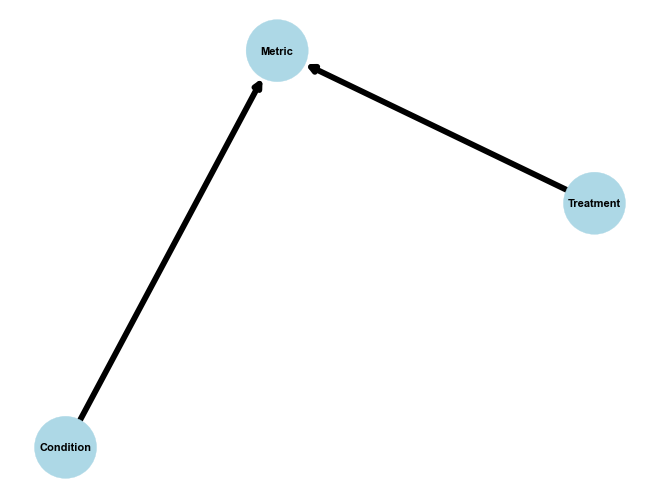

Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 52.40it/s]


年龄对dbpjieshu数据中，Treatment的ACE： 3.46095689090987


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 986.20it/s]


年龄对petco2jieshu数据中，Treatment的ACE： -2.5388701385572716


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 150.63it/s]


年龄对HR10数据中，Treatment的ACE： 3.1241083748444964


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 968.07it/s]


年龄对IPI3数据中，Treatment的ACE： 0.7009449313678513


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 94.83it/s]


年龄对moaasjieshu数据中，Treatment的ACE： 0.006436041834271922


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 57.89it/s]


性别对dbpjieshu数据中，Treatment的ACE： 2.246841909022095


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 699.13it/s]


性别对petco2jieshu数据中，Treatment的ACE： -1.9339974900317216


Fitting causal mechanism of node Condition: 100%|██████████| 3/3 [00:00<00:00, 10.81it/s]


性别对HR10数据中，Treatment的ACE： 4.1784989464439235


KeyboardInterrupt: 

In [24]:
causal_model = dowhy.gcm.InvertibleStructuralCausalModel(
    nx.DiGraph([('Treatment', 'Metric'), ('Condition', 'Metric')])
)
dowhy.gcm.util.plot(causal_model.graph)

for medical_data, medical_label in zip(medical_data_list, medical_data_labels):
    dowhy.gcm.auto.assign_causal_mechanisms(causal_model, medical_data,
                                            quality=dowhy.gcm.auto.AssignmentQuality.BETTER,
                                            override_models=True)
    dowhy.gcm.fit(causal_model, medical_data)
    ACE = dowhy.gcm.average_causal_effect(causal_model,
                                          "Metric",
                                          {'Treatment': lambda x : 1}, {'Treatment': lambda x: 0},
                                          num_samples_to_draw=len(medical_data))
    print(medical_label + "数据中，Treatment的ACE：", ACE)